<table>
    <tr>
        <td>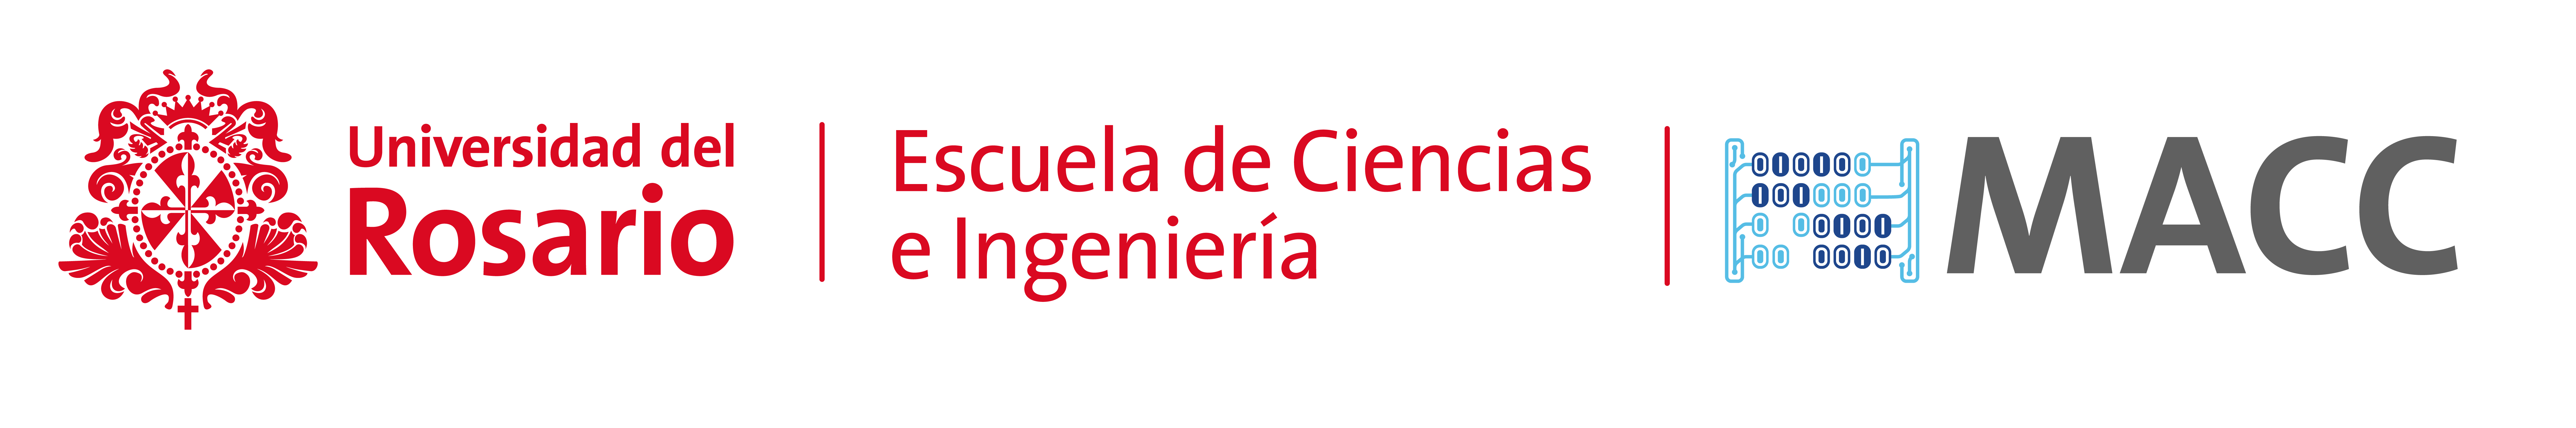</td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;text-align:center">  Regresión logistica        </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Aprendizaje Automático de Máquina </p></tp>
            <tp><p style="font-size:80%;text-align:center">Maestría MACC 2025-2</p></tp>
            <tp><p style="font-size:80%;text-align:center">Prof. Luis E. Seijas</p></tp>
        </td>
    </tr>
</table>

# Regresión Logistíca

La regresión logística es un algoritmo de aprendizaje supervisado que se utiliza para problemas de clasificación. A diferencia de la regresión lineal, que predice un valor continuo, la regresión logística predice la probabilidad de que una instancia pertenezca a una clase particular.

Generalmente, se usa para clasificación binaria, donde el resultado es una de dos clases (por ejemplo, 'Sí' o 'No', '1' o '0'). El modelo utiliza la función logística (o sigmoide) para transformar la salida de una ecuación lineal en una probabilidad, que siempre estará en el rango de 0 a 1. Si esta probabilidad supera un umbral (normalmente 0.5), se asigna a una clase; de lo contrario, se asigna a la otra.

Algunos ejemplos de su aplicación incluyen la detección de correo no deseado (spam o no spam), el diagnóstico médico (paciente enfermo o sano) o la predicción de riesgo crediticio.

## Construcción del Modelo de Regresión Logística

El modelo de regresión logística se basa en la función logística (o sigmoide) para estimar la probabilidad de que una instancia pertenezca a una clase particular. A continuación, se detalla su construcción.

### Modelo en Forma Matricial

El modelo se construye en dos etapas principales:

1.  **Combinación Lineal de Características:** Primero, se calcula una puntuación (o log-odds) `z` como una combinación lineal de las variables de entrada (matriz de características `X`) y un vector de parámetros (o pesos) `θ`.

    $$ z = X \cdot \theta $$

    Donde:
    -   `X` es la matriz de características de tamaño `(m, n+1)`, donde `m` es el número de ejemplos y `n` es el número de características. La columna adicional corresponde al término de intercepción (sesgo), que es usualmente un vector de unos.
    -   `θ` es el vector de parámetros del modelo de tamaño `(n+1, 1)`.

2.  **Aplicación de la Función Logística (Sigmoide):** La puntuación `z` se transforma en una probabilidad, que debe estar en el rango `[0, 1]`, utilizando la función sigmoide `g(z)`. La hipótesis del modelo `h(θ)` se define como:

    $$ h_{\theta}(X) = g(X \theta) = \frac{1}{1 + e^{-X \theta}} $$

    El resultado `h(θ)(X)` es un vector de probabilidades, donde cada elemento representa la probabilidad de que la observación correspondiente pertenezca a la clase positiva (clase 1).

### Gráfica de la Función Logística

La función sigmoide tiene una característica forma de "S" que es fundamental para la regresión logística. A continuación, se presenta el código en Python para visualizar esta función.



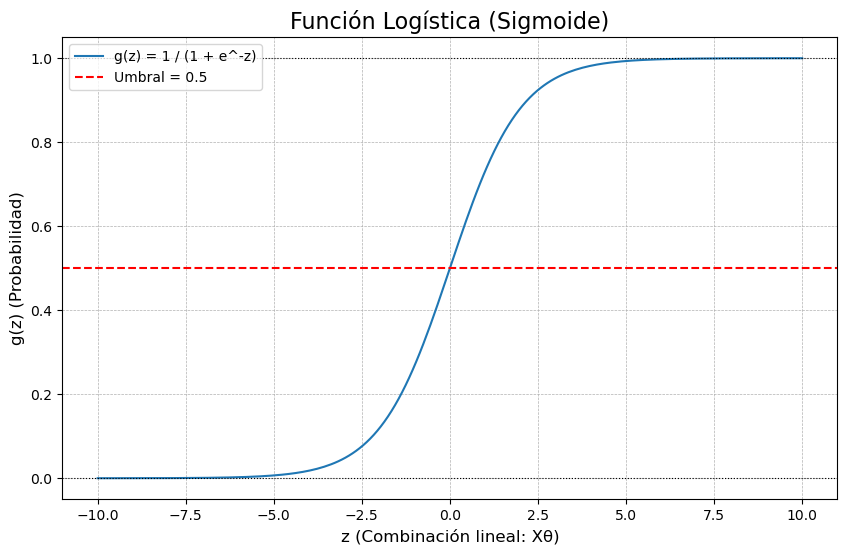

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Rango de valores para z
z = np.linspace(-10, 10, 200)

# Función sigmoide
sigmoid = 1 / (1 + np.exp(-z))

# Creación de la gráfica
plt.figure(figsize=(10, 6))
plt.plot(z, sigmoid, label='g(z) = 1 / (1 + e^-z)')
plt.title('Función Logística (Sigmoide)', fontsize=16)
plt.xlabel('z (Combinación lineal: Xθ)', fontsize=12)
plt.ylabel('g(z) (Probabilidad)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axhline(y=0.5, color='r', linestyle='--', label='Umbral = 0.5')
plt.axhline(y=0.0, color='k', linestyle=':', linewidth=0.8)
plt.axhline(y=1.0, color='k', linestyle=':', linewidth=0.8)
plt.legend()
plt.show()

## Entrenamiento del Modelo y Función de Costo

Para que el modelo de regresión logística aprenda a hacer predicciones precisas, es necesario entrenarlo con un conjunto de datos. El entrenamiento consiste en encontrar los parámetros $\theta$ óptimos que minimicen la diferencia entre las predicciones del modelo y los valores reales. Esto se logra a través de una función de costo y un algoritmo de optimización.

### Función de Costo (Log Loss)

A diferencia de la regresión lineal, que utiliza el error cuadrático medio, la regresión logística emplea una función de costo diferente debido a la naturaleza no lineal de la función sigmoide. La función de costo para la regresión logística se conoce como **Pérdida Logarítmica (Log Loss)** o **Entropía Cruzada Binaria**.

Para un solo ejemplo de entrenamiento, la función de costo se define como:

$$ \text{Costo}(h_{\theta}(x), y) = -[y \log(h_{\theta}(x)) + (1-y) \log(1 - h_{\theta}(x))] $$

Esta función tiene dos casos principales:
-   Si la clase real $y = 1$, el costo es $-\log(h_{\theta}(x))$. El costo es 0 si el modelo predice `1` con certeza ($h_{\theta}(x) = 1$), y tiende a infinito si predice `0`.
-   Si la clase real $y = 0$, el costo es $-\log(1 - h_{\theta}(x))$. El costo es 0 si el modelo predice `0` con certeza ($h_{\theta}(x) = 0$), y tiende a infinito si predice `1`.

La función de costo total $J(\theta)$ para todo el conjunto de datos (con $m$ ejemplos) es el promedio de los costos individuales:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_{\theta}(x^{(i)})) + (1-y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] $$

El objetivo del entrenamiento es encontrar los valores de $\theta$ que minimicen $J(\theta)$.

#### Forma Matricial de la Función de Costo

La función de costo también se puede expresar de forma compacta utilizando notación matricial:

$$ J(\theta) = -\frac{1}{m} \left( y^T \log(h_{\theta}(X)) + (1-y)^T \log(1 - h_{\theta}(X)) \right) $$

Donde:
-   $y$ es el vector de etiquetas reales de tamaño $(m, 1)$.
-   $h(\theta)(X)$ es el vector de predicciones del modelo.
-   $\log$ se aplica elemento por elemento.

#### Optimización con Descenso del Gradiente

Para minimizar la función de costo $J(\theta)$, se utiliza un algoritmo de optimización como el **Descenso del Gradiente**. Este algoritmo ajusta iterativamente los parámetros $\theta$ en la dirección opuesta al gradiente (la derivada) de la función de costo.

La regla de actualización para cada parámetro $\theta_j$ en cada iteración es:

$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $$

El gradiente de la función de costo es:

$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

Sustituyendo el gradiente en la regla de actualización, obtenemos la misma fórmula que en la regresión lineal:

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} $$

Donde:
-   $\alpha$ es la **tasa de aprendizaje (learning rate)**, que controla el tamaño de los pasos en cada actualización.
-   $(h_{\theta}(x^{(i)}) - y^{(i)})$ es el error de predicción para el i-ésimo ejemplo.
-   $x_j^{(i)}$ es el valor de la j-ésima característica para el i-ésimo ejemplo.


## Fronteras de decisión

Primeras filas del conjunto de datos:
   Longitud del Sépalo  Ancho del Sépalo  Especie
0                  5.1               3.5        0
1                  4.9               3.0        0
2                  4.7               3.2        0
3                  4.6               3.1        0
4                  5.0               3.6        0

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Longitud del Sépalo  100 non-null    float64
 1   Ancho del Sépalo     100 non-null    float64
 2   Especie              100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


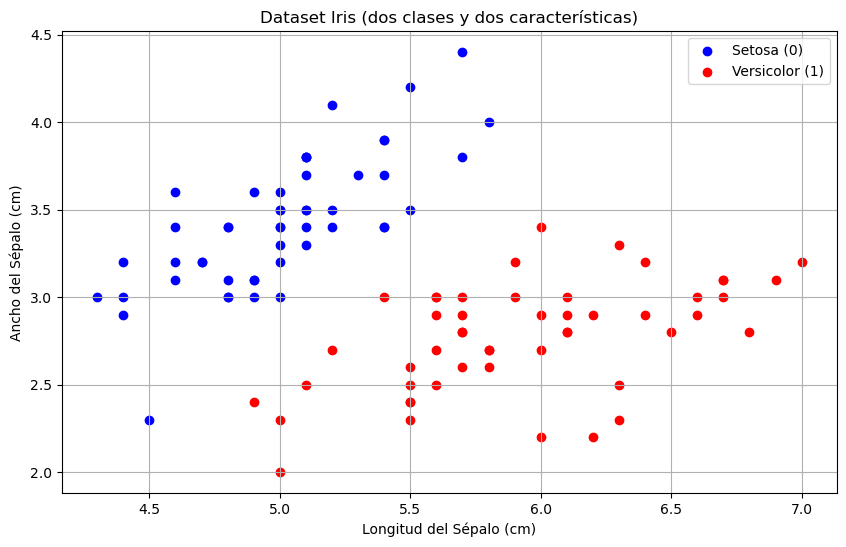

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()

# Para simplificar y visualizar, usaremos solo dos características y dos clases
# Características: longitud del sépalo y ancho del sépalo
# Clases: Setosa (0) y Versicolor (1)
mask = iris.target < 2
X = iris.data[mask, :2]
y = iris.target[mask]


# Crear un DataFrame para explorar los datos
df = pd.DataFrame(X, columns=['Longitud del Sépalo', 'Ancho del Sépalo'])
df['Especie'] = y

print("Primeras filas del conjunto de datos:")
print(df.head())
print("\nInformación del DataFrame:")
df.info()

# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Setosa (0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor (1)')
plt.title('Dataset Iris (dos clases y dos características)')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.legend()
plt.grid(True)
plt.show()

Una vez que el modelo de regresión logística ha sido entrenado, este aprende un conjunto de parámetros $\theta$ que definen cómo clasificar nuevas instancias. La **frontera de decisión** es la línea o superficie que separa las predicciones de una clase de las de otra.

### La Frontera en Términos de Probabilidad

A diferencia de otros algoritmos que pueden crear fronteras "duras", la regresión logística define esta separación en términos de probabilidad.

1.  **Predicción de Probabilidad:** El modelo calcula la probabilidad de que una instancia pertenezca a la clase positiva (clase 1) usando la función sigmoide:
    $$ P(y=1 | X; \theta) = h_{\theta}(X) = \frac{1}{1 + e^{-X\theta}} $$

2.  **Umbral de Decisión:** Por lo general, se utiliza un umbral de 0.5 para clasificar.
    -   Si $h_{\theta}(X) \ge 0.5$, se predice la clase 1.
    -   Si $h_{\theta}(X) < 0.5$, se predice la clase 0.

La frontera de decisión es, por lo tanto, el conjunto de puntos donde el modelo está "indeciso", es decir, donde la probabilidad de pertenecer a cualquiera de las dos clases es exactamente la misma:
$$ h_{\theta}(X) = 0.5 $$

### Derivación Matemática de la Frontera

Para que la función sigmoide $h_{\theta}(X)$ sea igual a 0.5, su argumento (la combinación lineal $X\theta$) debe ser igual a cero.

$$ \frac{1}{1 + e^{-X\theta}} = 0.5 \implies 1 + e^{-X\theta} = 2 \implies e^{-X\theta} = 1 \implies -X\theta = 0 \implies X\theta = 0 $$

Esto significa que la frontera de decisión está definida por la ecuación:
$$ \theta^T X = 0 $$

Para un problema con dos características ($x_1$ y $x_2$), como en nuestro ejemplo del dataset Iris, la ecuación de la frontera es:
$$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $$
Esta es la ecuación de una **línea recta**.

-   **Región de Clase 1:** Cualquier punto para el cual $\theta^T X > 0$ tendrá una probabilidad $h_{\theta}(X) > 0.5$ y será clasificado como 1.
-   **Región de Clase 0:** Cualquier punto para el cual $\theta^T X < 0$ tendrá una probabilidad $h_{\theta}(X) < 0.5$ y será clasificado como 0.

El entrenamiento del modelo consiste en encontrar los parámetros $\theta$ que definen la línea (o hiperplano) que mejor separa las clases en el espacio de características.

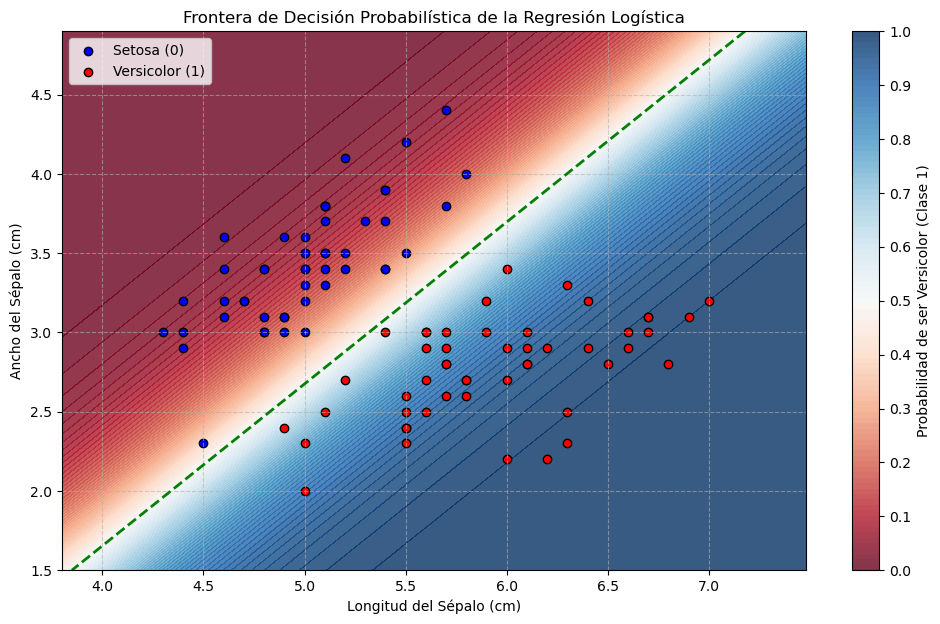

In [9]:
# Importa la clase LogisticRegression de scikit-learn para crear el modelo
# y numpy para operaciones numéricas, especialmente para crear la malla de predicción.
from sklearn.linear_model import LogisticRegression
import numpy as np

# --- Creación y Entrenamiento del Modelo ---
# 1. Se instancia el modelo de regresión logística.
#    LogisticRegression() crea un objeto que encapsula el algoritmo.
model = LogisticRegression()

# 2. Se entrena el modelo con los datos.
#    El método .fit() ajusta el modelo a los datos de entrenamiento (X, y).
#    Durante este proceso, el algoritmo encuentra los valores óptimos para los
#    parámetros (coeficientes e intercepto) que minimizan la función de costo,
#    definiendo así la mejor frontera de decisión lineal para separar las clases.
model.fit(X, y)

# --- Preparación de la Malla para Visualización ---
# 3. Se define el área de la gráfica creando un margen alrededor de los datos.
#    Se toman los valores mínimos y máximos de las dos características (columnas 0 y 1 de X)
#    y se les resta/suma 0.5 para que la visualización no quede cortada en los bordes.
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# 4. Se crea una malla (grid) de puntos que cubre toda el área de la gráfica.
#    np.meshgrid() genera dos matrices de coordenadas 'xx' y 'yy'. Cada punto (xx[i,j], yy[i,j])
#    en esta malla será utilizado para evaluar la predicción del modelo y así visualizar
#    las probabilidades en todo el espacio de características.
#    El paso 0.02 determina la resolución de la malla; un valor más pequeño crea una
#    visualización más suave pero computacionalmente más costosa.
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# --- Predicción de Probabilidades en la Malla ---
# 5. Se predice la probabilidad para cada punto de la malla.
#    - np.c_[xx.ravel(), yy.ravel()] convierte las matrices 'xx' y 'yy' en vectores largos
#      y los apila como columnas, creando una lista de todos los puntos (x, y) en la malla.
#    - model.predict_proba(...) calcula la probabilidad de pertenencia a cada clase para cada punto.
#      Devuelve un array de forma (n_puntos, 2), donde la columna 0 es P(clase=0) y la columna 1 es P(clase=1).
#    - [:, 1] selecciona solo la probabilidad de la clase 1 (Versicolor).
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# 6. Se redimensiona el vector de probabilidades 'Z' para que coincida con la forma de la malla 'xx'.
#    Esto es necesario para que la función de contorno pueda interpretar los valores de probabilidad
#    en su ubicación espacial correcta.
Z = Z.reshape(xx.shape)

# --- Visualización de Resultados ---
# 7. Se crea la figura para la gráfica.
plt.figure(figsize=(12, 7))

# 8. Se dibuja un mapa de calor (contour plot) con las probabilidades.
#    - plt.contourf() crea un contorno relleno.
#    - xx, yy, Z son las coordenadas y los valores de probabilidad.
#    - levels=np.linspace(0, 1, 100) define 100 niveles de color para una transición suave.
#    - cmap=plt.cm.RdBu usa un mapa de color Rojo-Azul, ideal para mostrar la transición de
#      probabilidad de una clase (azul, prob=0) a la otra (rojo, prob=1).
#    - alpha=0.8 hace el fondo ligeramente transparente.
levels = np.linspace(0, 1, 100)
contour = plt.contourf(xx, yy, Z, levels=levels, cmap=plt.cm.RdBu, alpha=0.8)

# 9. Se añade una barra de color que sirve como leyenda para las probabilidades.
cbar = plt.colorbar(contour, ticks=np.arange(0, 1.1, 0.1))
cbar.set_label('Probabilidad de ser Versicolor (Clase 1)')

# 10. Se superponen los puntos de datos originales sobre el mapa de calor.
#     Esto permite ver cómo el modelo clasifica las regiones donde se encuentran los datos.
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Setosa (0)', edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Versicolor (1)', edgecolors='k')

# 11. Se dibuja explícitamente la frontera de decisión.
#     Esta es la línea donde la probabilidad predicha es exactamente 0.5.
#     plt.contour() (sin la 'f') dibuja solo las líneas de contorno en los niveles especificados.
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='g', linestyles='--')

# 12. Se configuran los títulos, etiquetas y otros elementos estéticos de la gráfica.
plt.title('Frontera de Decisión Probabilística de la Regresión Logística')
plt.xlabel('Longitud del Sépalo (cm)')
plt.ylabel('Ancho del Sépalo (cm)')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# 13. Se muestra la gráfica final.
plt.show()

# Regresión Softmax

La Regresión Softmax, también conocida como Regresión Logística Multinomial, es una generalización de la regresión logística que se utiliza para problemas de clasificación con más de dos clases (multiclase). Mientras que la regresión logística produce una probabilidad para una única clase (clasificación binaria), la regresión Softmax calcula una probabilidad para cada una de las clases posibles.

### 1. Puntuación Softmax para la Clase k (Score Function)

Para un vector de entrada $x$, el modelo primero calcula una puntuación (score) $s_k(x)$ para cada una de las $K$ clases. Esta puntuación es una función lineal de $x$, similar a la regresión lineal.

$$ s_k(x) = (\theta^{(k)})^T \cdot x $$

Donde:
-   $K$ es el número total de clases.
-   $x$ es el vector de características de una instancia (con $x_0 = 1$ para el término de intercepción).
-   $\theta^{(k)}$ es el vector de parámetros (pesos) asociado específicamente a la clase $k$.
-   Cada clase tiene su propio vector de parámetros. Todos estos vectores se agrupan en una matriz de parámetros $\Theta$ de tamaño $(n+1) \times K$, donde $n$ es el número de características.

### 2. La Función Softmax

Una vez que se han calculado las puntuaciones para todas las clases, se aplica la **función Softmax** para convertirlas en probabilidades. La probabilidad estimada de que la instancia $x$ pertenezca a la clase $k$, denotada como $\hat{p}_k$, se calcula de la siguiente manera:

$$ \hat{p}_k = \sigma(s(x))_k = \frac{\exp(s_k(x))}{\sum_{j=1}^{K} \exp(s_j(x))} $$

Propiedades clave de la función Softmax:
-   **Normalización:** La suma de las probabilidades para todas las clases es igual a 1 ($\sum_{k=1}^{K} \hat{p}_k = 1$), lo que resulta en una distribución de probabilidad válida.
-   **Salida Positiva:** Cada probabilidad estimada $\hat{p}_k$ está en el rango $[0, 1]$.
-   **Monotónica:** Un aumento en la puntuación $s_k(x)$ conduce a un aumento en la probabilidad $\hat{p}_k$.

### 3. Ecuación de Clasificación (Predicción)

El clasificador de regresión Softmax predice la clase que tiene la mayor probabilidad estimada. Esto es equivalente a seleccionar la clase con la puntuación más alta, ya que la función exponencial es monotónicamente creciente.

$$ \hat{y} = \underset{k}{\operatorname{argmax}} \, \hat{p}_k = \underset{k}{\operatorname{argmax}} \, s_k(x) = \underset{k}{\operatorname{argmax}} \, ((\theta^{(k)})^T \cdot x) $$

### 4. Función de Costo (Entropía Cruzada)

El objetivo del entrenamiento es encontrar la matriz de parámetros $\Theta$ que minimice la diferencia entre las probabilidades predichas y las distribuciones de probabilidad reales. Para ello, se utiliza la **función de costo de Entropía Cruzada (Cross-Entropy)**.

Para un conjunto de $m$ instancias de entrenamiento, la función de costo es:

$$ J(\Theta) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{p}_k^{(i)}) $$

Donde:
-   $y_k^{(i)}$ es un **indicador binario (one-hot encoding)**. Es $1$ si la clase real de la i-ésima instancia es $k$, y $0$ en caso contrario.
-   $\hat{p}_k^{(i)}$ es la probabilidad estimada de que la i-ésima instancia pertenezca a la clase $k$.

La entropía cruzada penaliza al modelo cuando asigna una baja probabilidad a la clase correcta.

#### Relación con la Divergencia de Kullback-Leibler (KL)

La entropía cruzada está estrechamente relacionada con la divergencia KL, una medida de cuán diferente es una distribución de probabilidad de otra. La entropía cruzada entre una distribución "real" $p$ y una distribución "predicha" $q$ se define como:

$$ H(p, q) = H(p) + D_{KL}(p || q) $$

Donde $H(p)$ es la entropía de la distribución real y $D_{KL}(p || q)$ es la divergencia KL. En el aprendizaje automático, la distribución real $p$ (las etiquetas $y$) es fija, por lo que su entropía $H(p)$ es constante. Por lo tanto, **minimizar la entropía cruzada $H(p, q)$ es equivalente a minimizar la divergencia KL $D_{KL}(p || q)$**, lo que significa hacer que la distribución de probabilidad predicha por el modelo sea lo más parecida posible a la distribución real.

### 5. Gradiente de la Entropía Cruzada

Para minimizar la función de costo $J(\Theta)$ usando el descenso del gradiente, necesitamos calcular su gradiente con respecto a los parámetros de cada clase. El gradiente de la función de costo con respecto al vector de parámetros de la clase $k$, $\theta^{(k)}$, es sorprendentemente simple y elegante:

$$ \nabla_{\theta^{(k)}} J(\Theta) = \frac{1}{m} \sum_{i=1}^{m} (\hat{p}_k^{(i)} - y_k^{(i)}) x^{(i)} $$

Este gradiente mide el error promedio en las predicciones para la clase $k$ (la diferencia entre la probabilidad predicha y la real), ponderado por los valores de las características. Durante el entrenamiento, los parámetros $\theta^{(k)}$ se ajustan en la dirección opuesta a este gradiente para reducir el costo.

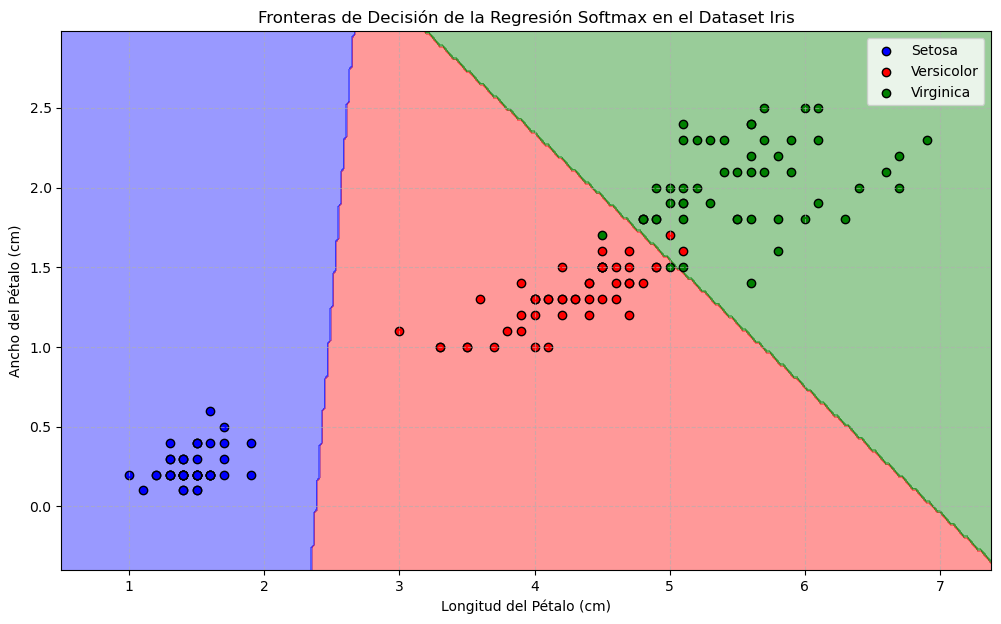

In [14]:
from matplotlib.colors import ListedColormap

# Cargar los datos completos de Iris (las 4 características y 3 clases)
# Las variables iris, X_full, y y_full ya están definidas en celdas anteriores.
X_full = iris.data
y_full = iris.target

# --- Entrenamiento del Modelo Softmax ---
# Se crea una instancia de LogisticRegression. Para problemas multiclase,
# usará la regresión Softmax por defecto si el solver lo soporta (como 'lbfgs').
# 'solver='lbfgs'' es un optimizador eficiente para este tipo de modelo.
# El modelo se entrena con las 4 características.
softmax_reg = LogisticRegression(solver='lbfgs', C=10)
softmax_reg.fit(X_full, y_full)

# --- Preparación de la Malla para Visualización (usando características de pétalo) ---
# Para una mejor visualización, usaremos las características 3 y 4 (longitud y ancho del pétalo).
x_min, x_max = X_full[:, 2].min() - .5, X_full[:, 2].max() + .5
y_min, y_max = X_full[:, 3].min() - .5, X_full[:, 3].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# --- Predicción y Visualización de Fronteras ---
# Para predecir en la malla 2D, necesitamos proporcionar las 4 características.
# Usaremos la media de las características del sépalo (las dos primeras) y los
# valores de la malla para las características del pétalo.
sepal_length_mean = X_full[:, 0].mean()
sepal_width_mean = X_full[:, 1].mean()
grid_points = np.c_[np.full(xx.ravel().shape, sepal_length_mean), np.full(xx.ravel().shape, sepal_width_mean), xx.ravel(), yy.ravel()]

# Se predice la clase para cada punto en la malla
Z = softmax_reg.predict(grid_points)
Z = Z.reshape(xx.shape)

# Creación de la gráfica
plt.figure(figsize=(12, 7))

# Definir un mapa de colores personalizado que coincida con los puntos
custom_cmap = ListedColormap(['blue', 'red', 'green'])

# Se dibujan las regiones de decisión con el mapa de colores personalizado
plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.4)

# Se superponen los puntos de datos de entrenamiento (visualizando las características del pétalo)
plt.scatter(X_full[y_full==0, 2], X_full[y_full==0, 3], c='blue', label='Setosa', edgecolors='k')
plt.scatter(X_full[y_full==1, 2], X_full[y_full==1, 3], c='red', label='Versicolor', edgecolors='k')
plt.scatter(X_full[y_full==2, 2], X_full[y_full==2, 3], c='green', label='Virginica', edgecolors='k')

# Configuración de la gráfica
plt.title('Fronteras de Decisión de la Regresión Softmax en el Dataset Iris')
plt.xlabel('Longitud del Pétalo (cm)')
plt.ylabel('Ancho del Pétalo (cm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Mostrar la gráfica
plt.show()